In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import date
import pickle
import numpy as np

In [20]:
df = pd.read_csv('car data.csv')

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df = df.drop('Car_Name', axis = 1)

In [23]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [25]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [26]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [27]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
df = pd.get_dummies(df,drop_first=True)

In [30]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [45]:
current_date = date.today()

In [50]:
current_year = current_date.year

In [51]:
current_year

2021

In [52]:
df['No. of years used'] = current_year - df.Year

In [54]:
df = df.drop('Year', axis = 1)

In [55]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No. of years used
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


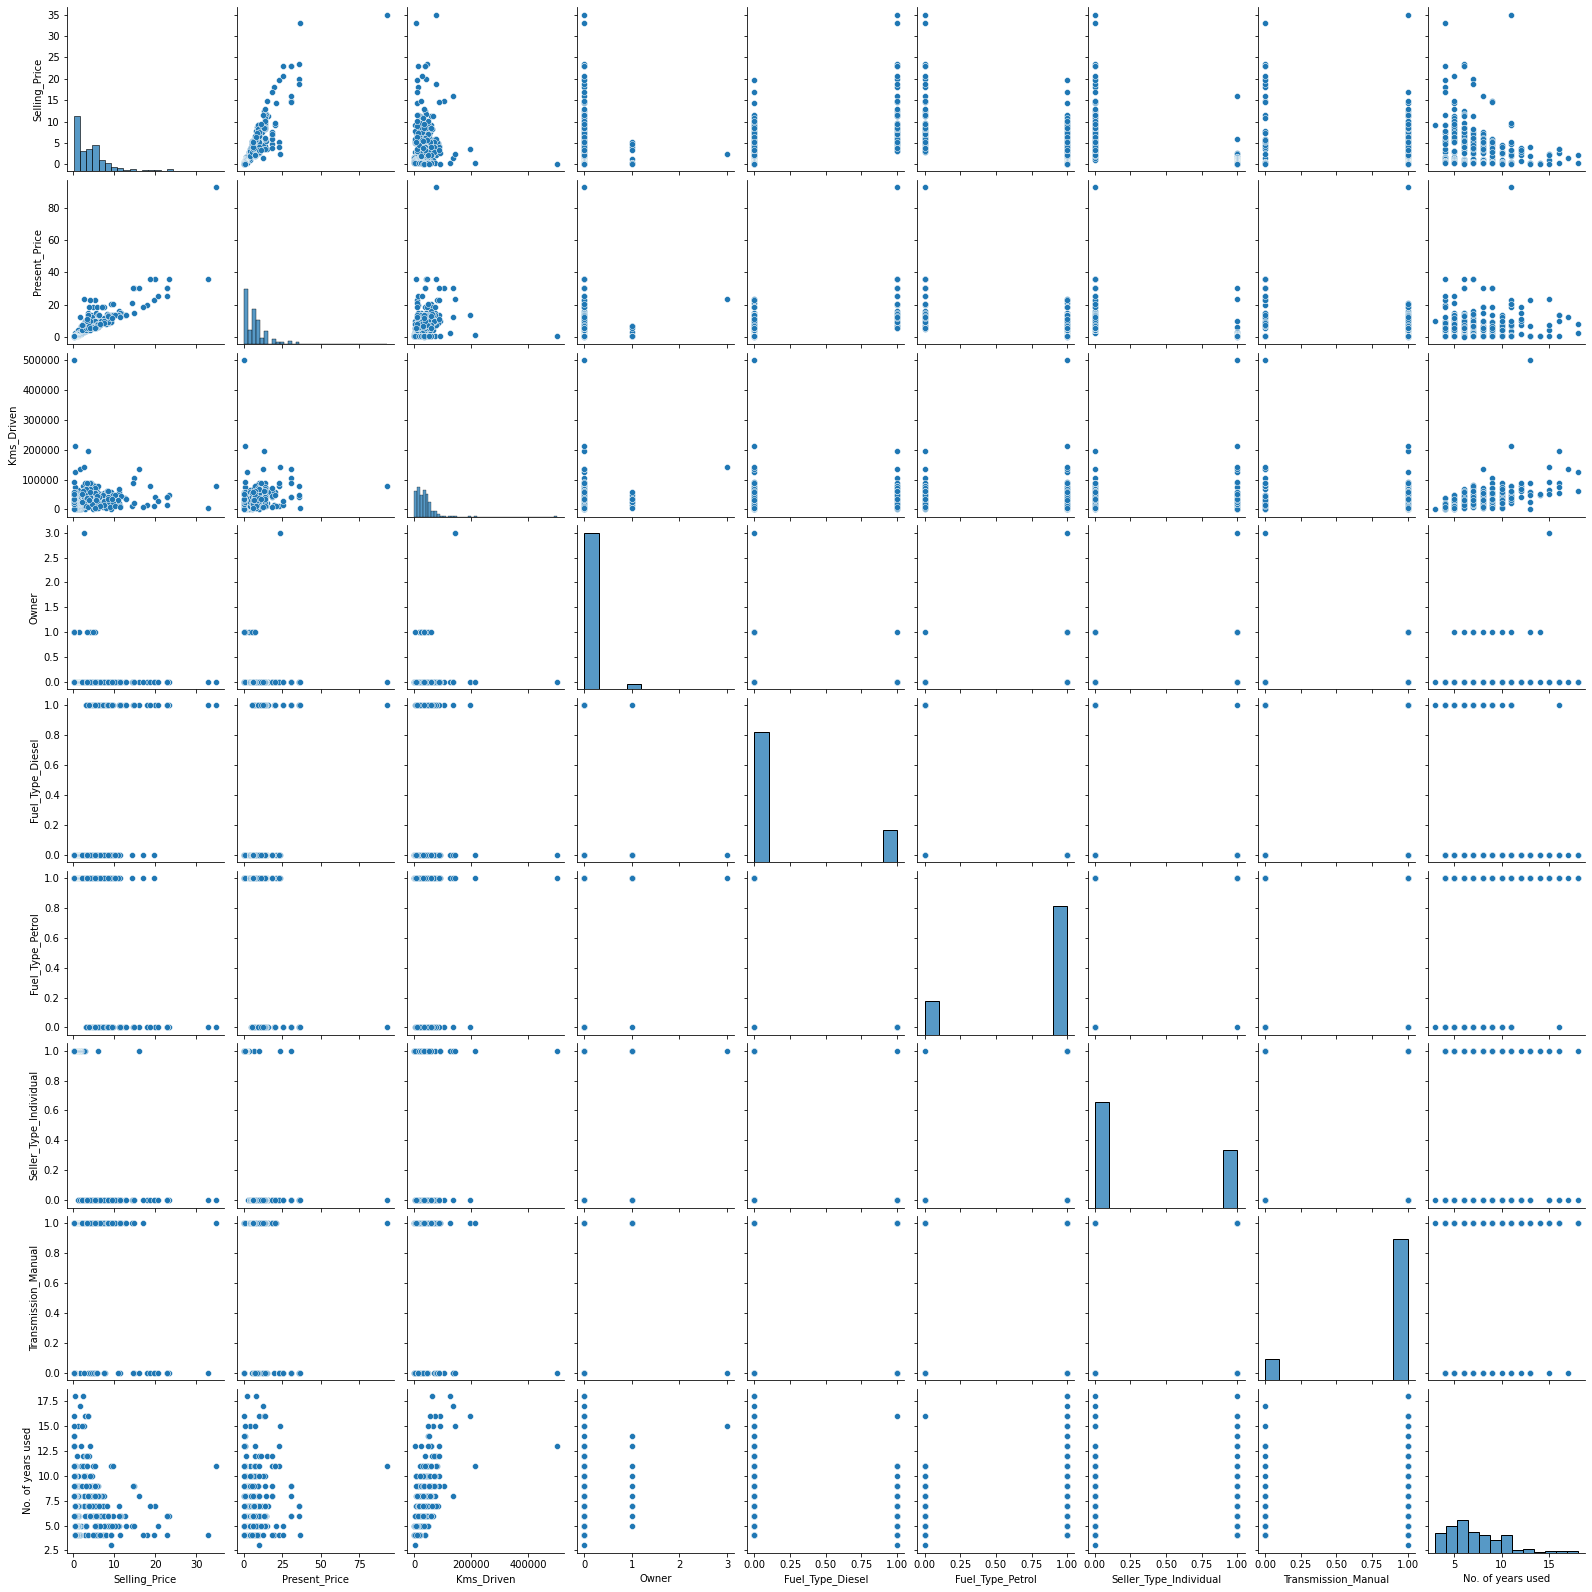

In [57]:
sns.pairplot(df)

In [56]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No. of years used
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
No. of years used,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


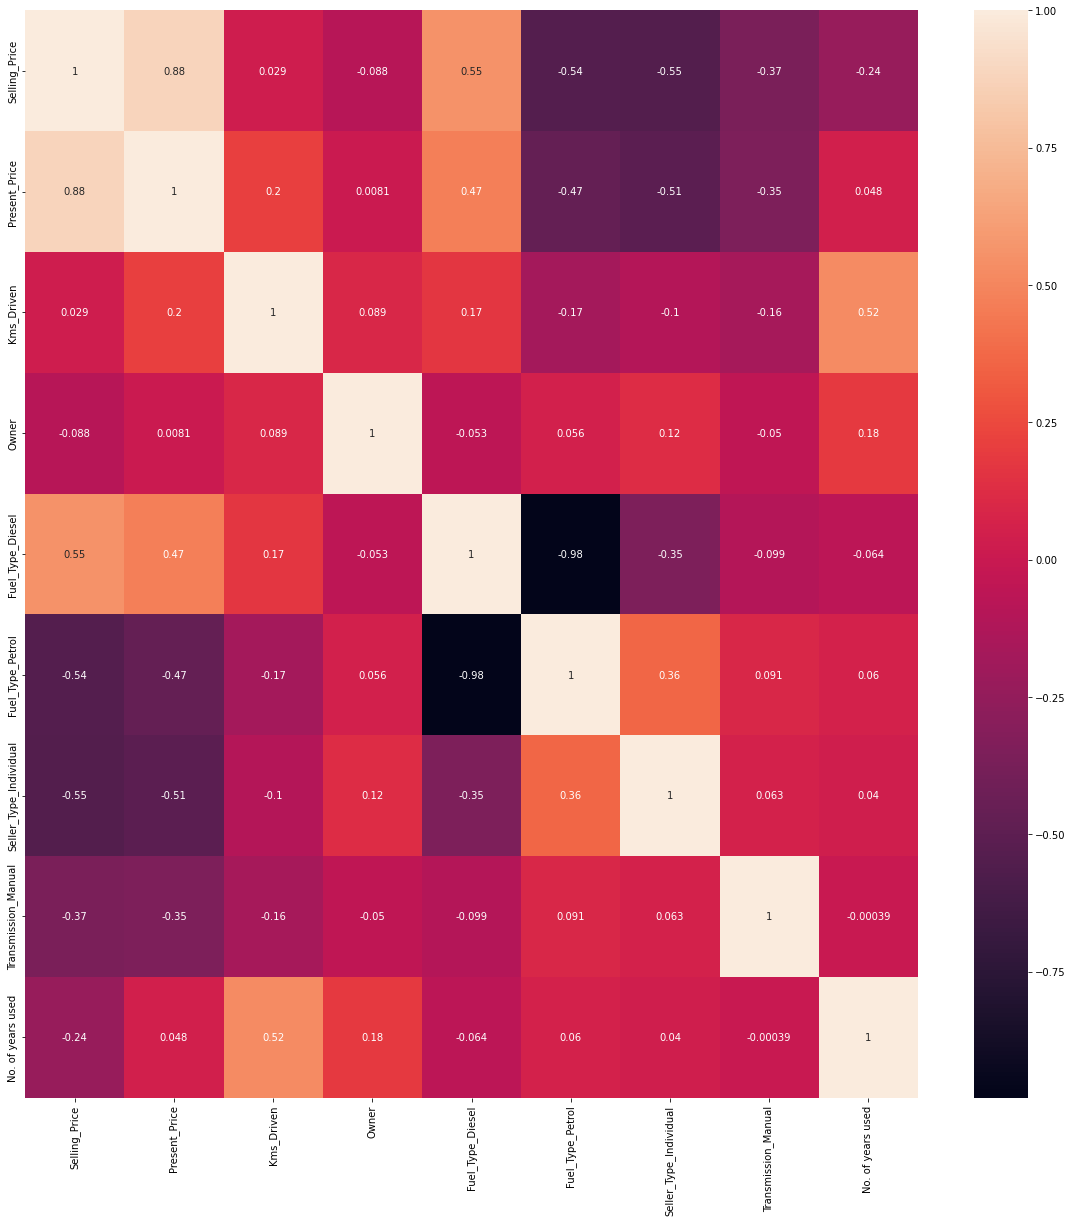

In [62]:
corr = df.corr()
top_corr_feature = corr.index
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df[top_corr_feature].corr(),annot=True)

In [63]:
df.shape

(301, 9)

In [65]:
X = df.iloc[:,1:]
y = df.Selling_Price

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
model_feat_imp = ExtraTreesRegressor()

In [71]:
model_feat_imp.fit(X,y)

ExtraTreesRegressor()

In [73]:
model_feat_imp_val = model_feat_imp.feature_importances_

<AxesSubplot:>

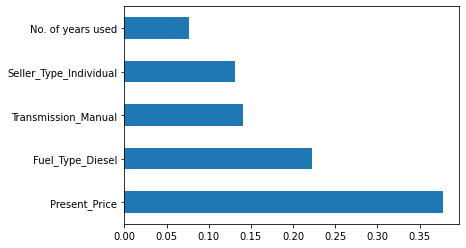

In [77]:
feat_imp = pd.Series(model_feat_imp_val, X.columns)
feat_imp.nlargest().plot(kind = 'barh')

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [79]:
regressor = RandomForestRegressor()

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [83]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [95]:
rf = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [96]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=5; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [5, 16, 27, 38, 50]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [98]:
rf.best_score_

-4.418264244947843

In [99]:
pred = rf.predict(X_test)

C:\Users\USER\.conda\envs\carpred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

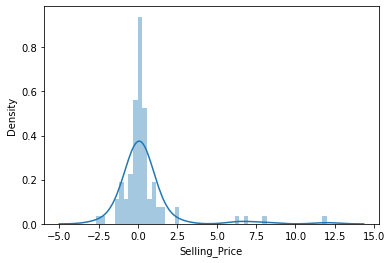

In [100]:
sns.distplot(y_test-pred)

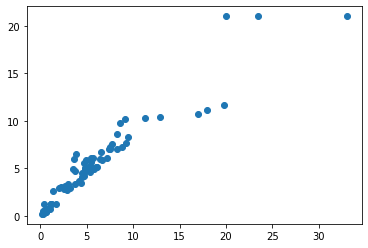

In [101]:
plt.scatter(y_test,pred)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.8742328979342707
MSE: 3.850139412830537
RMSE: 1.9621772123920247


In [103]:
file = open('randomforest.pkl', 'wb')
pickle.dump(rf,file)